<h1>Importing</h1>

Importing all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.inspection import DecisionBoundaryDisplay

<h1>Data Preparation</h1>

You are given datasets of breast-cancer-wisconsin and diabetes. Apply some data analysis on both, such as checking shape, dtypes, missing data, outliers, and then prepare your data for modeling.

PS: Check value_counts for target columns of both dataset as well. 

<h2>Breast Cancer Dataset</h2>

In [2]:
df1 = pd.read_csv('../data/breast-cancer-wisconsin.csv')

In [3]:
df1.head()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df1.dtypes

SampleCodeNumber             int64
ClumpThickness               int64
UniformityOfCellSize         int64
UniformityOfCellShape        int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

In [5]:
df1['BareNuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent', missing_values = '?')

transformed_BareNuclei = si.fit_transform(df1[['BareNuclei']])
df1[['BareNuclei']] = transformed_BareNuclei

In [7]:
df1['BareNuclei'] = df1['BareNuclei'].astype(np.int64)

In [8]:
df1['BareNuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [9]:
df1.isna().sum()

SampleCodeNumber            0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [10]:
## There is no outlier it seems
(df1 == 0).sum(axis = 0)

SampleCodeNumber            0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [11]:
df1.corr()['Class'].sort_values(ascending = False)

Class                       1.000000
BareNuclei                  0.818968
UniformityOfCellShape       0.818934
UniformityOfCellSize        0.817904
BlandChromatin              0.756616
ClumpThickness              0.716001
NormalNucleoli              0.712244
MarginalAdhesion            0.696800
SingleEpithelialCellSize    0.682785
Mitoses                     0.423170
SampleCodeNumber           -0.080226
Name: Class, dtype: float64

In [12]:
## 4 indicates malignant - very virulent or infectious.
## 2 indicates benign - not harmful in effect.

## It seems that Class column data is balanced well enough

df1['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

<h2>Diabetes Dataset</h2>

In [13]:
df2 = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [14]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
## All objects are needed to be encoded
df2.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [16]:
df2 = pd.get_dummies(df2, drop_first = True)

In [17]:
df2.shape

(100000, 14)

In [18]:
df2.corr()['diabetes'].sort_values(ascending = False)

diabetes                       1.000000
blood_glucose_level            0.419558
HbA1c_level                    0.400660
age                            0.258008
bmi                            0.214357
hypertension                   0.197823
heart_disease                  0.171727
smoking_history_former         0.097917
gender_Male                    0.037666
smoking_history_never          0.027267
smoking_history_ever           0.024080
smoking_history_not current    0.020734
smoking_history_current        0.019606
gender_Other                  -0.004090
Name: diabetes, dtype: float64

In [19]:
df2.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Male                    0
gender_Other                   0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [20]:
## It seems that the data lacks from appropriate balancing. If a model is trained, it will learn Class 0 really well but Class 1
df2['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<h1>Modeling</h1>

The following describes some parameters for DecisionTree

criterion - How you want to measure impurity of each node and leaf? Gini, Entropy, or Log-Loss?

max_depth - How many depths you want for construction of tree at maximum?

min_samples_split - How many samples you want inside each node at minimum?

min_samples_leaf - How many samples you want inside each leaf at minimum?

max_leaf_nodes - How many leaves you want for your tree at maximum?

min_impurity_decrease - How much impurity change you want at minimum?

min_weight_fraction_leaf - How much weight you want at each leaf at minimum ? weight = number of samples / total number of samples

max_features - How many features you want at each node?

class_weight - How much weight you want for each class? (This is used in case of high imbalance between numbers of samples in each class)

ccp_alpha - Which brand would you like to eliminate?

<h2>Modeling with Breast Cancer Dataset</h2>

Initially, we use breast-cancer-wisconsin dataset to have a better understanding of tree structure more comfortably.

In this task, you are going plot tree with fitted model of Decision Tree Classifier. Start with default parameters for modeling and use plot_tree method to analyze your tree. Include the parameters of **feauture_names** as your column names and **filled** as True. Furthermore, use plt.savefig to save the plot in your computer and call plt.figure function to define dpi parameter.

In [21]:
## Split your dataset and fit it
X = df1.drop(['SampleCodeNumber', 'Class'], axis = 1)
y = df1.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

1.0
0.9485714285714286


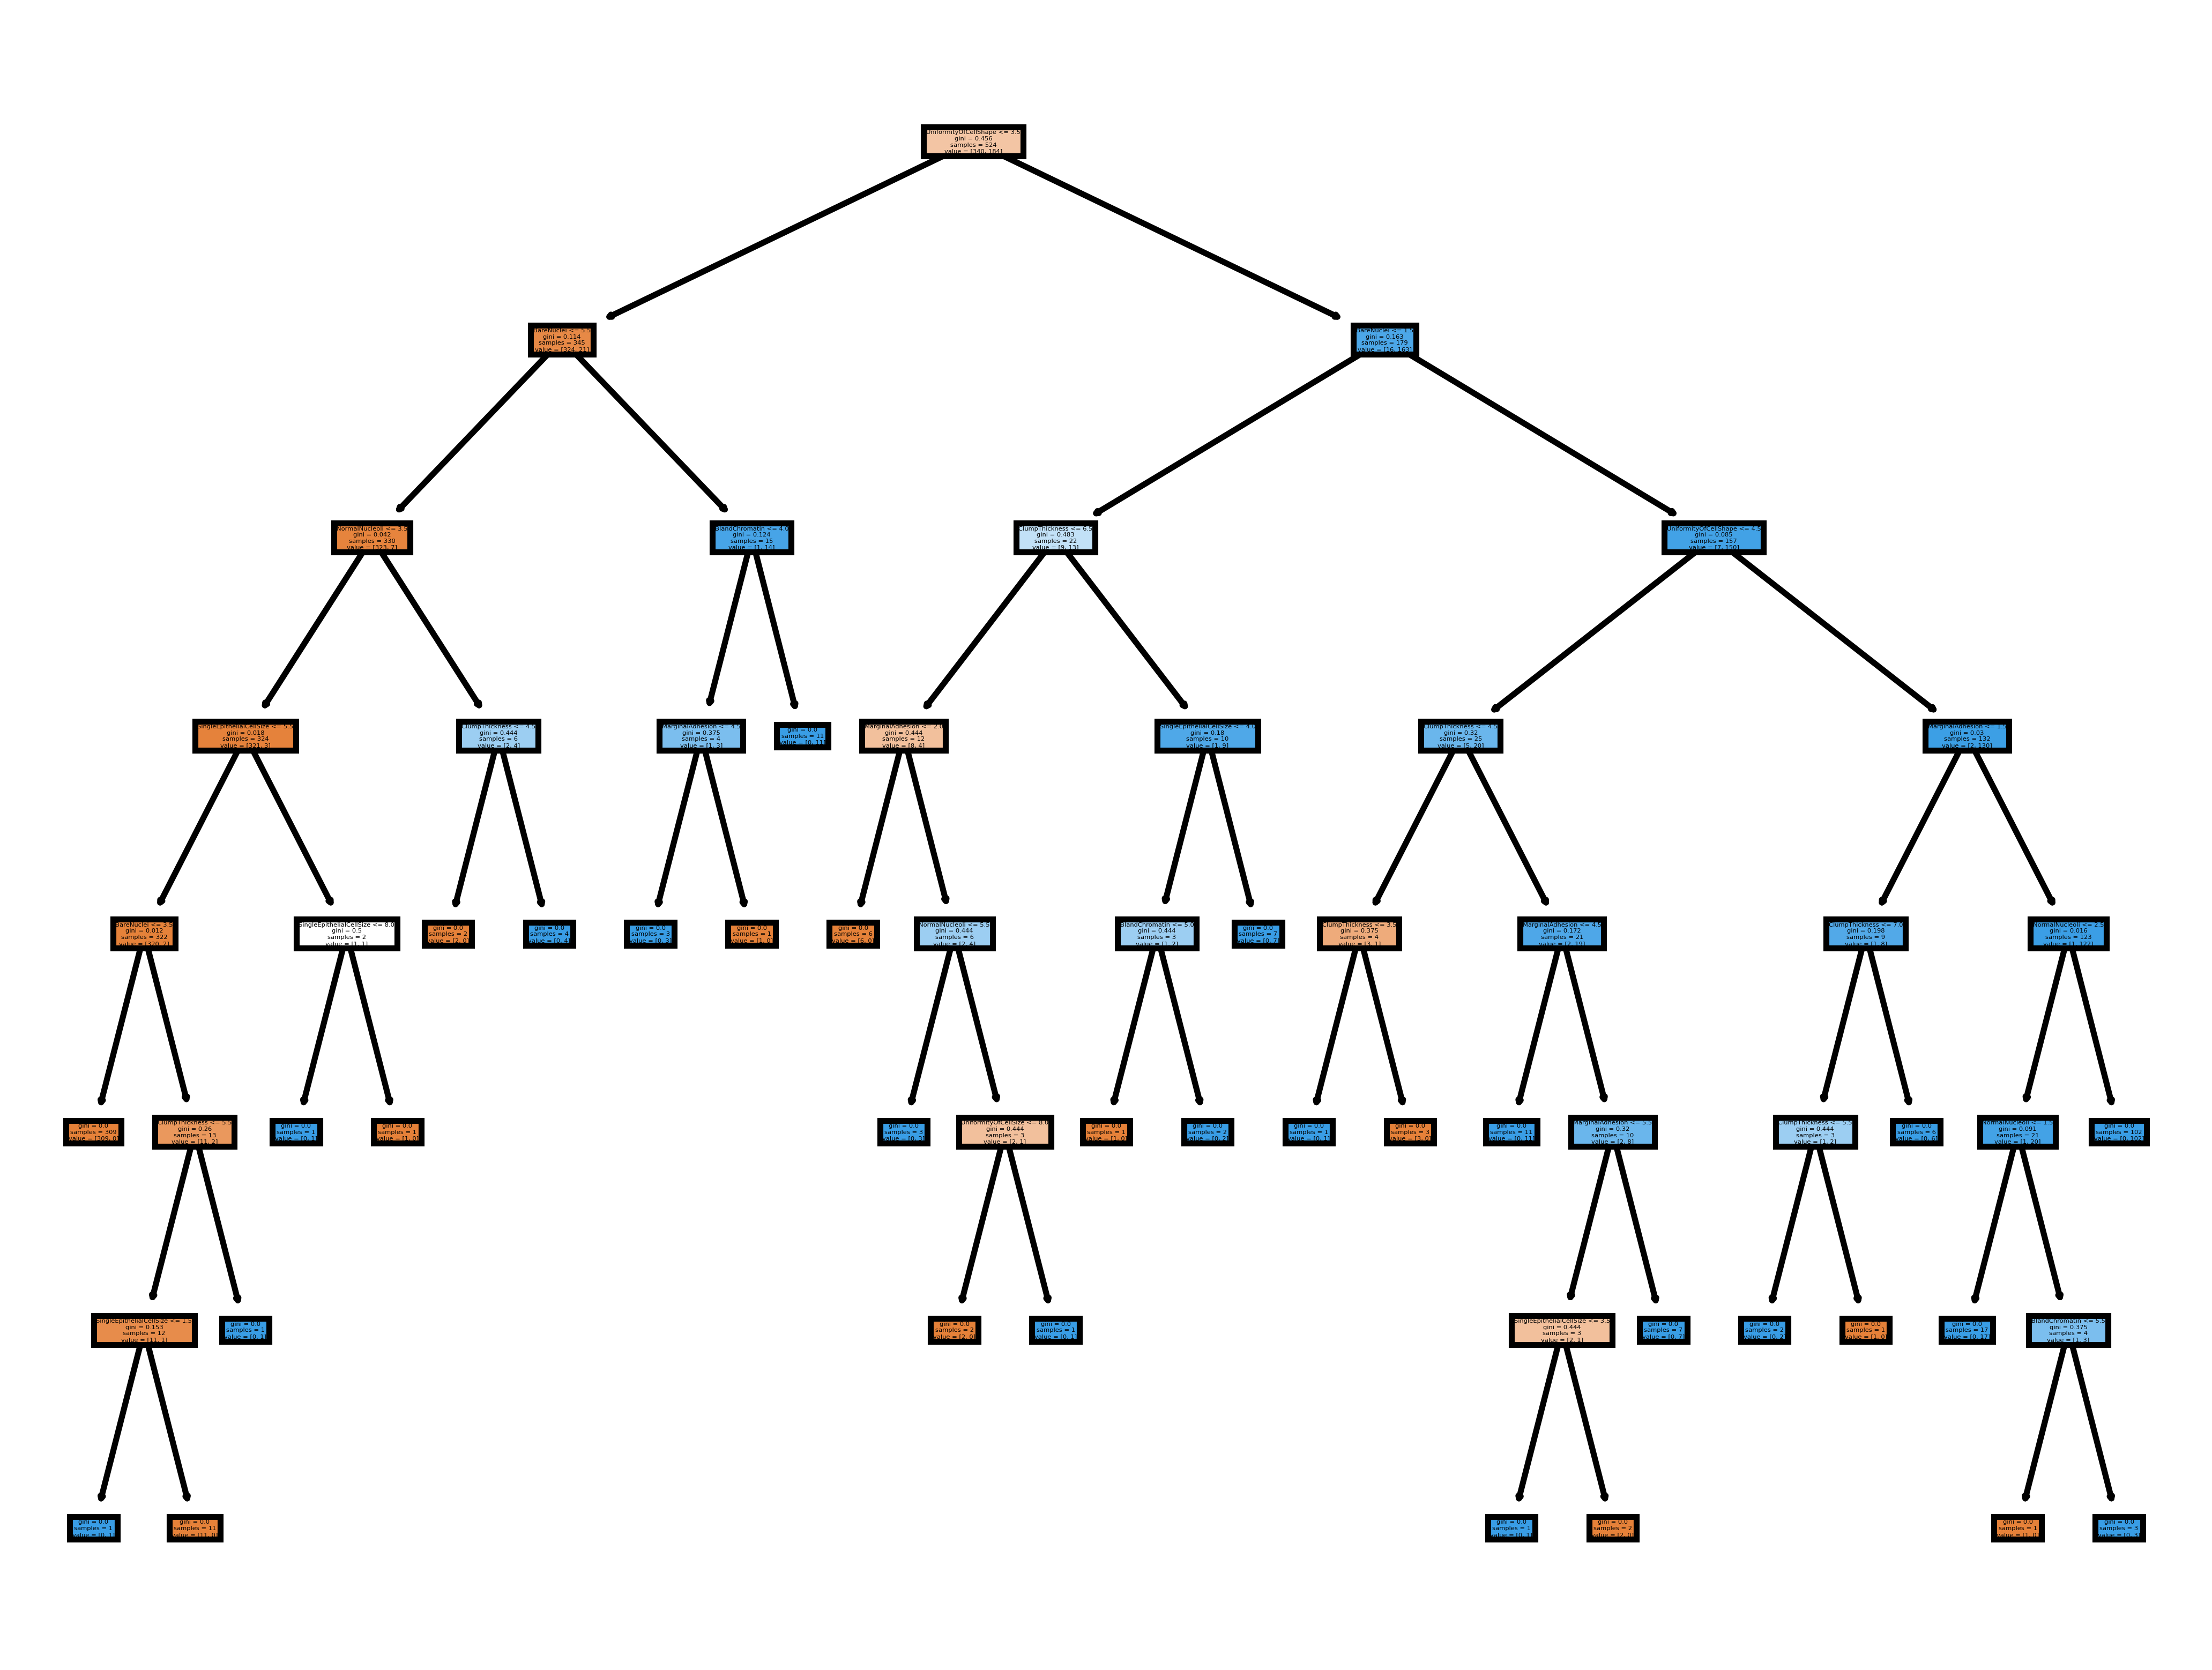

In [23]:
plt.figure(dpi = 800)

## Plot your tree
plot_tree(dtc, feature_names = X_train.columns, filled = True)

plt.savefig('structure_of_tree.png')

In [24]:
dtc.get_depth()

7

In [25]:
dtc.get_n_leaves()

31

In [26]:
## Analyzing Feature Importances
pd.Series(dict(zip(X_train.columns, dtc.feature_importances_))).sort_values(ascending = False)

UniformityOfCellShape       0.718791
BareNuclei                  0.123930
ClumpThickness              0.058128
NormalNucleoli              0.028935
MarginalAdhesion            0.027767
SingleEpithelialCellSize    0.023464
BlandChromatin              0.013402
UniformityOfCellSize        0.005584
Mitoses                     0.000000
dtype: float64

Our tree is very complicated and hard to interpret. To understand what is happening in tree, you can zoom in so that you might see details or you would create a simpler tree structure by defining parameters of max_depth = 3, for instance.

In [27]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)
print(dtc.get_depth())
print(dtc.get_n_leaves())

3
8


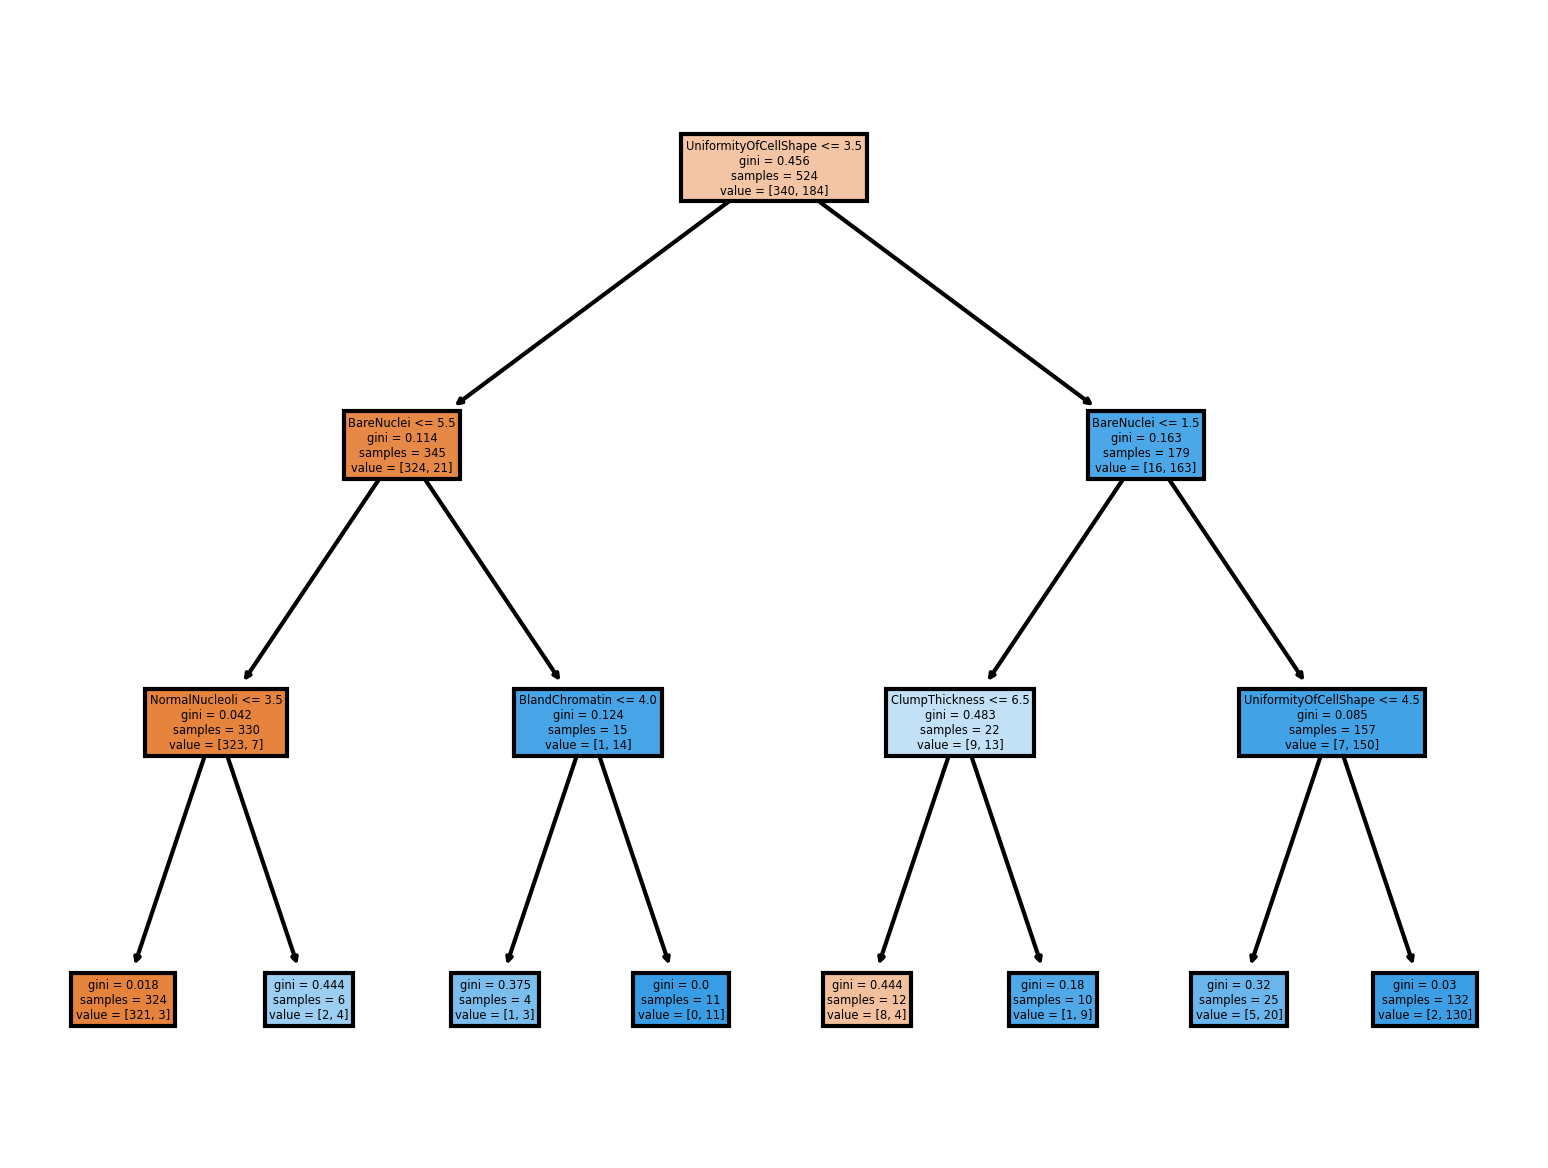

In [28]:
plt.figure(dpi = 300)

## Plot your tree
plot_tree(dtc, feature_names = X_train.columns, filled = True)

plt.savefig('restricted_structure_of_tree.png')

Your next task is to define parameters of max_depth, max_leaf_nodes, and criterion as different values and see changes while plotting the tree. Try to choose small values such as 1-5 for maximum depth, 1-10 for max_leaf_nodes, etc. You can play around the other parameters for later.

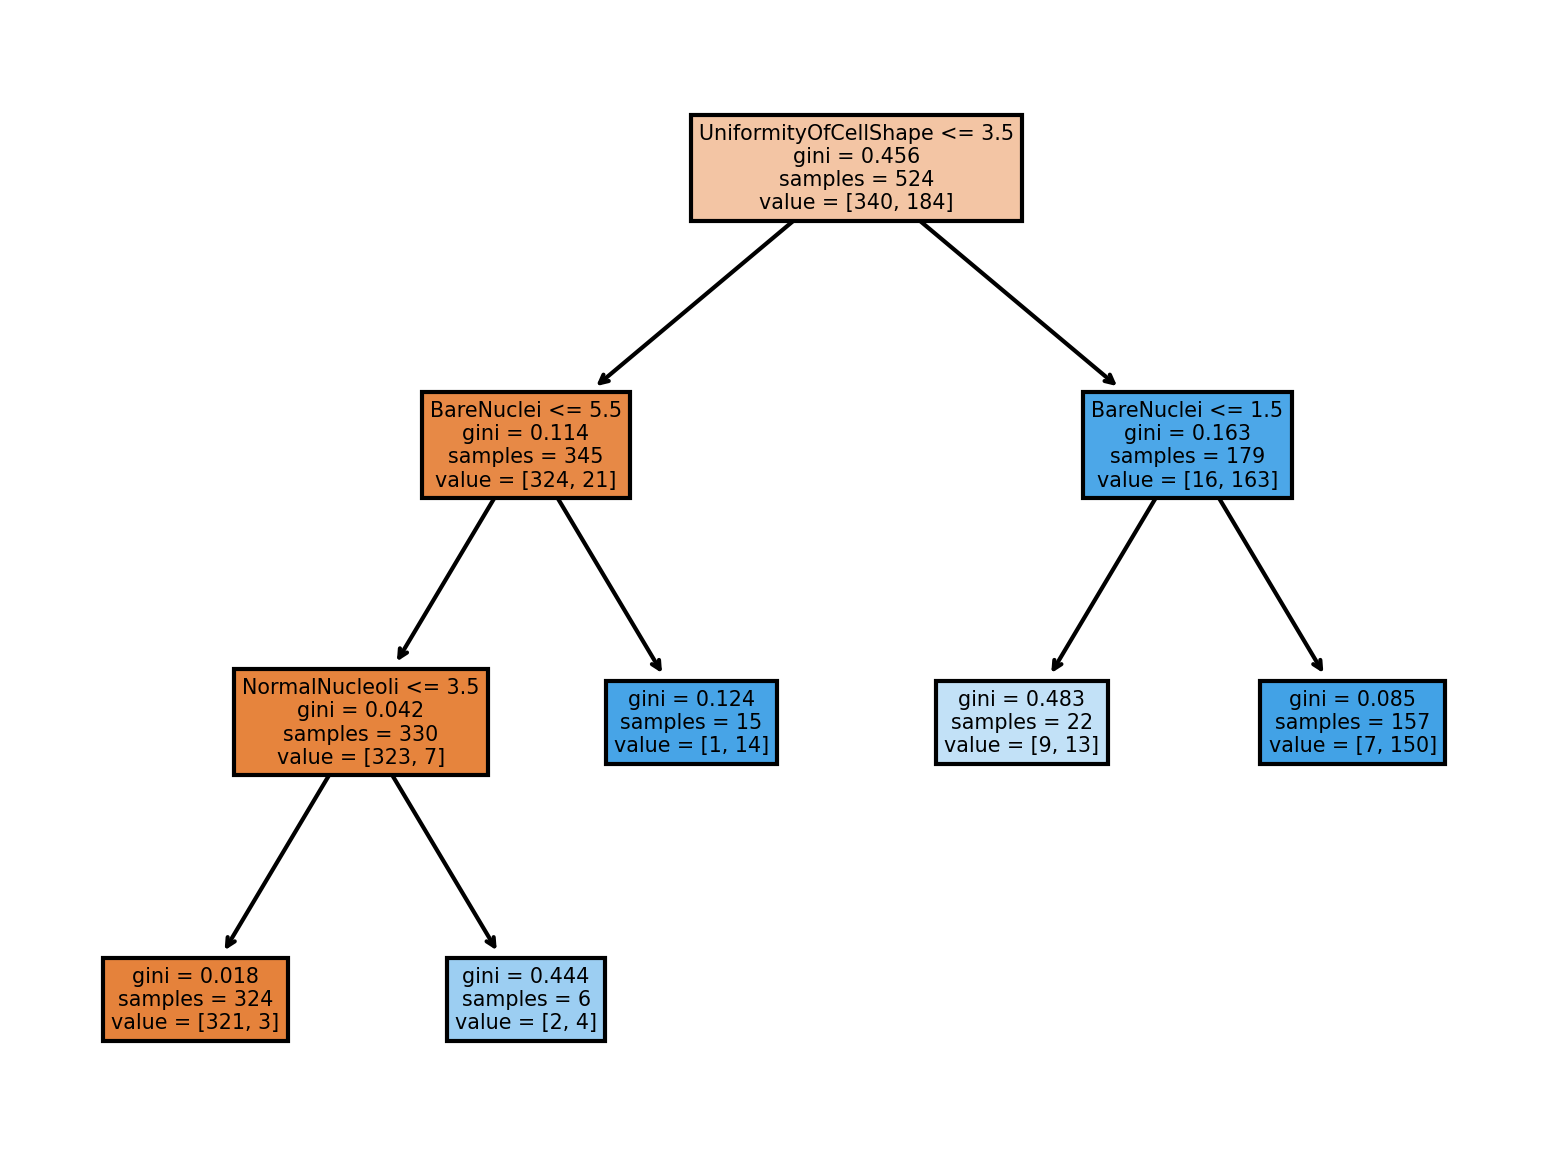

In [29]:
dtc = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 5)
dtc.fit(X_train, y_train)

plt.figure(dpi = 300)

## Plot your tree
plot_tree(dtc, feature_names = X_train.columns, filled = True)

plt.savefig('restricted_structure_of_tree.png')

<h2>Modeling with Diabetes Dataset<h2>

The rest of tutorial will be about diabetes_prediction_dataset.csv with which we will have better understanding of overfitting in Decision Trees. If you haven't done any data prepation steps for this dataset, do it now and finish your training.

In [30]:
X = df2[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease']]
y = df2['diabetes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

After modeling, check your scores on both train and test dataset. Probably, you will have score over 0.90 with default parameters but do you think it is so good?

In [33]:
## It seems model learned extremely good
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9974
0.95416


Unfortunately, the model still overfits. To understand why, read the next cells and run the cell of decision boundary code.

Cols contain two most important features affecting target column. The aim is to plot decision boundaries for given these features by fitting on train dataset and predicting on test dataset with **default** parameters.

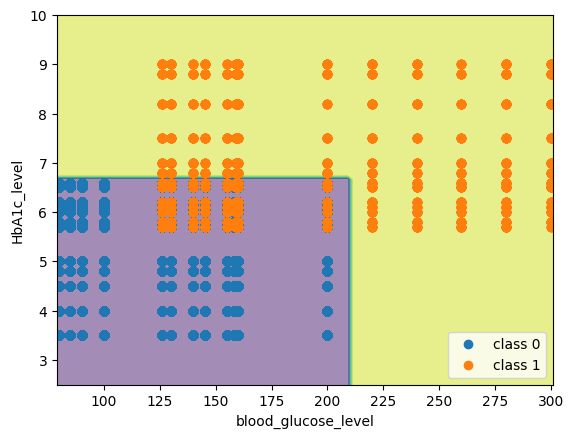

In [34]:

## Choosing two most important features
cols = ['blood_glucose_level', 'HbA1c_level']

## Display Method
display = DecisionBoundaryDisplay

## Fitting
model = DecisionTreeClassifier()
model.fit(X_train[cols], y_train)

ax = plt.subplot()

## Plotting Decision Boundaries
display.from_estimator(
    model,
    X_test[cols],
    response_method = 'predict',
    xlabel = cols[0],
    ylabel = cols[1],
    alpha = 0.5,
    ax = ax
)

## Plotting Data Points

class_0 = y_test == 0
class_1 = y_test == 1

ax.scatter(X_test.loc[class_0, cols[0]], X_test.loc[class_0, cols[1]], label = 'class 0')
ax.scatter(X_test.loc[class_1, cols[0]], X_test.loc[class_1, cols[1]], label = 'class 1')

plt.legend(loc = 'lower right')
plt.show()

Blue data points indicate there is no diabete detected while Orange is for reverse case. It is clearly seen from the plot that orange points have passed decision boundaries however, there is not any misprediction for non-diabete cases - blue data points. 

The model obviously overfits for cases of having diabetes. Why? Remember value_counts()? It showed us that 91500 samples of data belongs to class 0 - no diabete while only 8500 - only 8.5% of target column is about class 1. The model would learn class 0 really well, however, lack of information about class 1 paves the way for bad fitting for only this class. To analyze such cases, it is recommended to have information about precision, recall, and f1 score although it is out of the scope for this tutorial.

How to fix this issue? Use class_weight = 'balanced' and play around with other parameters if there is still overfitting. You can also check ccp_alpha parameter to see if it can help

In [35]:
from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)

y_test_0 = y_test[y_test == 0]
y_pred_0 = y_pred[y_test == 0]

y_test_1 = y_test[y_test == 1]
y_pred_1 = y_pred[y_test == 1]

print('Accuracy Score on Class 0:', accuracy_score(y_test_0, y_pred_0))
print('Accuracy Score on Class 1:', accuracy_score(y_test_1, y_pred_1))

Accuracy Score on Class 0: 0.9752297592997812
Accuracy Score on Class 1: 0.7302325581395349


In [36]:
dtc = DecisionTreeClassifier(max_depth = 10, class_weight = 'balanced')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [37]:
y_pred = dtc.predict(X_test)

y_test_0 = y_test[y_test == 0]
y_pred_0 = y_pred[y_test == 0]

y_test_1 = y_test[y_test == 1]
y_pred_1 = y_pred[y_test == 1]

print('Accuracy Score on Class 0:', accuracy_score(y_test_0, y_pred_0))
print('Accuracy Score on Class 1:', accuracy_score(y_test_1, y_pred_1))

Accuracy Score on Class 0: 0.8818818380743982
Accuracy Score on Class 1: 0.9204651162790698


In [38]:
dtc.score(X_test, y_test)

0.8852

In [39]:
dtc.get_depth()

10

In [40]:
dtc.get_n_leaves()

68

<h1>Optional Homework</h1>

Create a function computing gini index for given input. The input can be list, array, pandas series objects, etc. Therefore, it is better to convert them inside the function by using the method of np.asarray() which converts each container-like objects to numpy arrays.

Do the same for entropy computation.

Create a function computing Information Gain based on the metric - entropy or gini.

Apply the functions you created on the dataset. For example, you can define threshold of 200 for blood_glucose_level and see gini index or entropy in your new nodes combined with Information Gain.